In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [2]:
# Load all the data
all_runs = pd.read_csv("summary_data/tidy_numbers.csv")
# Jump through some hopes to reomve suspect data...
numerical=all_runs.iloc[:,2:]
numerical.mask(abs(numerical) > 1e8, np.nan,inplace=True)
#numerical.mask(abs(numerical) < 1e-6, np.nan,inplace=True)
all_runs.iloc[:,2:]=numerical

In [3]:
lgm=all_runs.loc[all_runs['experiment'] == 'lgm-cal-adj']
lgm.set_index('model', inplace = True)
lgm['experiment']='lgm'
lgm['ensemble']='lgm'
lgm['run']='expt'
all_pis=all_runs.loc[all_runs['experiment'] == 'piControl']
all_pis.set_index('model', inplace = True)
lgm_pis=all_pis[all_pis.index.isin(lgm.index)]
lgm_pis['ensemble']='lgm'
lgm_pis['run']='ctl'

In [4]:
midHolocene=all_runs.loc[all_runs['experiment'] == 'midHolocene-cal-adj']
midHolocene.set_index('model', inplace = True)
midHolocene['experiment']='midHolocene'
midHolocene['ensemble']='midHolocene'
midHolocene['run']='expt'
midHolocene_pis=all_pis[all_pis.index.isin(midHolocene.index)]
midHolocene_pis['ensemble']='midHolocene'
midHolocene_pis['run']='ctl'

In [5]:
lig127k=all_runs.loc[all_runs['experiment'] == 'lig127k-cal-adj']
lig127k.set_index('model', inplace = True)
lig127k['experiment']='lig127k'
lig127k['ensemble']='lig127k'
lig127k['run']='expt'
lig127k_pis=all_pis[all_pis.index.isin(lig127k.index)]
lig127k_pis['ensemble']='lig127k'
lig127k_pis['run']='ctl'

In [6]:
abrupt4xCO2=all_runs.loc[all_runs['experiment'] == 'abrupt4xCO2']
abrupt4xCO2.set_index('model', inplace = True)
abrupt4xCO2['ensemble']='abrupt4xCO2'
abrupt4xCO2['run']='expt'
abrupt4xCO2_pis=all_pis[all_pis.index.isin(abrupt4xCO2.index)]
abrupt4xCO2_pis['ensemble']='abrupt4xCO2'
abrupt4xCO2_pis['run']='ctl'

In [7]:
# Combine altogether
all_ensembles=pd.concat([lgm,lgm_pis,midHolocene,midHolocene_pis,lig127k,lig127k_pis,abrupt4xCO2,abrupt4xCO2_pis],ignore_index=True)

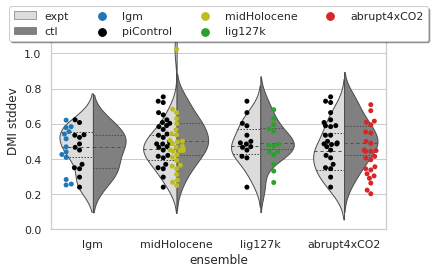

In [8]:
fig=plt.figure()
palette={"piControl": "black", 'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'}
ax=fig.add_subplot(111)
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="DMI stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="DMI stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
fig.savefig('plots/DMI.pdf')

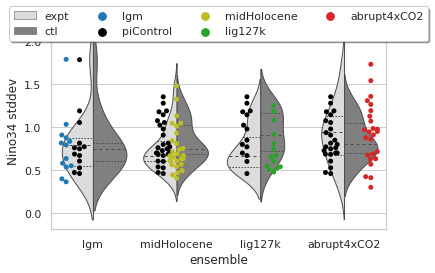

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="Nino34 stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="Nino34 stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
fig.savefig('plots/Nino34.pdf')

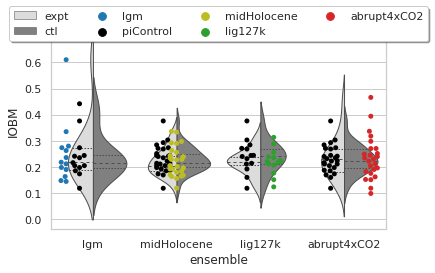

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="IOBM", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="IOBM", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
fig.savefig('plots/IOBM.pdf')

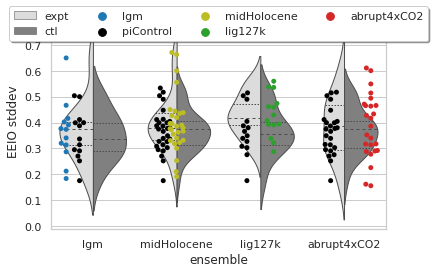

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax=sns.violinplot(data=all_ensembles, x="ensemble", y="EEIO stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax=sns.swarmplot(x="ensemble", y="EEIO stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
fig.savefig('plots/EEIO.pdf')